In [27]:
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('max_columns', 50)

In [2]:
# original dataset
match_ori = pd.read_csv('data/match_map_stats.csv')

In [3]:
match_ori.head()

,round_start_time,round_end_time,stage,match_id,game_number,match_winner,map_winner,map_loser,map_name,map_round,...,team_one_name,team_two_name,attacker_payload_distance,defender_payload_distance,attacker_time_banked,defender_time_banked,attacker_control_perecent,defender_control_perecent,attacker_round_end_score,defender_round_end_score
0,2018-01-11 00:12:07,2018-01-11 00:20:07,Overwatch League - Stage 1,10223,1,Los Angeles Valiant,Los Angeles Valiant,San Francisco Shock,Dorado,1,...,Los Angeles Valiant,San Francisco Shock,75.615051,0.000000,0.000000,240.000000,NaN,NaN,2,0
1,2018-01-11 00:22:05,2018-01-11 00:27:59,Overwatch League - Stage 1,10223,1,Los Angeles Valiant,Los Angeles Valiant,San Francisco Shock,Dorado,2,...,Los Angeles Valiant,San Francisco Shock,75.649597,75.615051,125.750572,0.000000,NaN,NaN,3,2
2,2018-01-11 00:34:39,2018-01-11 00:38:29,Overwatch League - Stage 1,10223,2,Los Angeles Valiant,Los Angeles Valiant,San Francisco Shock,Temple of Anubis,1,...,Los Angeles Valiant,San Francisco Shock,0.000000,0.000000,250.492004,240.000000,NaN,NaN,2,0
3,2018-01-11 00:40:27,2018-01-11 00:44:41,Overwatch League - Stage 1,10223,2,Los Angeles Valiant,Los Angeles Valiant,San Francisco Shock,Temple of Anubis,2,...,Los Angeles Valiant,San Francisco Shock,0.000000,0.000000,225.789032,250.492004,NaN,NaN,2,2
4,2018-01-11 00:46:09,2018-01-11 00:49:48,Overwatch League - Stage 1,10223,2,Los Angeles Valiant,Los Angeles Valiant,San Francisco Shock,Temple of Anubis,3,...,Los Angeles Valiant,San Francisco Shock,0.000000,0.000000,36.396057,250.492004,NaN,NaN,4,2


In [4]:
match_ori.columns

Index(['round_start_time', 'round_end_time', 'stage', 'match_id',
       'game_number', 'match_winner', 'map_winner', 'map_loser', 'map_name',
       'map_round', 'winning_team_final_map_score',
       'losing_team_final_map_score', 'control_round_name', 'attacker',
       'defender', 'team_one_name', 'team_two_name',
       'attacker_payload_distance', 'defender_payload_distance',
       'attacker_time_banked', 'defender_time_banked',
       'attacker_control_perecent', 'defender_control_perecent',
       'attacker_round_end_score', 'defender_round_end_score'],
      dtype='object')

In [5]:
# use 2021 season only
match_2021 = match_ori[match_ori['round_start_time']>='2021-01-01']

In [6]:
match_2021.reset_index(drop=True, inplace=True)

In [7]:
match_2021.head()

,round_start_time,round_end_time,stage,match_id,game_number,match_winner,map_winner,map_loser,map_name,map_round,...,team_one_name,team_two_name,attacker_payload_distance,defender_payload_distance,attacker_time_banked,defender_time_banked,attacker_control_perecent,defender_control_perecent,attacker_round_end_score,defender_round_end_score
0,2021-04-16 19:08:50,2021-04-16 19:11:30,OWL 2021,37234,1,Houston Outlaws,Houston Outlaws,Dallas Fuel,Busan,1,...,Houston Outlaws,Dallas Fuel,0.000000,0.000000,0.000000,0.000000,100.0,0.0,1,0
1,2021-04-16 19:12:16,2021-04-16 19:17:52,OWL 2021,37234,1,Houston Outlaws,Houston Outlaws,Dallas Fuel,Busan,2,...,Houston Outlaws,Dallas Fuel,0.000000,0.000000,0.000000,0.000000,99.0,100.0,1,1
2,2021-04-16 19:18:37,2021-04-16 19:23:17,OWL 2021,37234,1,Houston Outlaws,Houston Outlaws,Dallas Fuel,Busan,3,...,Houston Outlaws,Dallas Fuel,0.000000,0.000000,0.000000,0.000000,100.0,54.0,2,1
3,2021-04-16 19:30:47,2021-04-16 19:37:38,OWL 2021,37234,2,Houston Outlaws,Dallas Fuel,Houston Outlaws,King's Row,1,...,Houston Outlaws,Dallas Fuel,70.307037,0.000000,68.430008,0.000000,NaN,NaN,3,0
4,2021-04-16 19:39:10,2021-04-16 19:47:27,OWL 2021,37234,2,Houston Outlaws,Dallas Fuel,Houston Outlaws,King's Row,2,...,Houston Outlaws,Dallas Fuel,62.829689,70.307037,0.000000,68.430008,NaN,NaN,2,3


In [8]:
match_2021['match_id'].nunique()

228

In [9]:
match_2021.tail()

,round_start_time,round_end_time,stage,match_id,game_number,match_winner,map_winner,map_loser,map_name,map_round,...,team_one_name,team_two_name,attacker_payload_distance,defender_payload_distance,attacker_time_banked,defender_time_banked,attacker_control_perecent,defender_control_perecent,attacker_round_end_score,defender_round_end_score
2150,2021-09-26 01:57:42,2021-09-26 02:04:09,OWL 2021,37441,3,Shanghai Dragons,Shanghai Dragons,Atlanta Reign,King's Row,2,...,Atlanta Reign,Shanghai Dragons,70.287613,70.287613,93.260010,196.845001,NaN,NaN,3,3
2151,2021-09-26 02:05:35,2021-09-26 02:08:24,OWL 2021,37441,3,Shanghai Dragons,Shanghai Dragons,Atlanta Reign,King's Row,3,...,Atlanta Reign,Shanghai Dragons,9.008842,70.287613,0.000000,196.845001,NaN,NaN,5,3
2152,2021-09-26 02:09:50,2021-09-26 02:12:41,OWL 2021,37441,3,Shanghai Dragons,Shanghai Dragons,Atlanta Reign,King's Row,4,...,Atlanta Reign,Shanghai Dragons,9.014740,9.008842,25.285004,0.000000,NaN,NaN,6,5
2153,2021-09-26 02:53:59,2021-09-26 03:01:59,OWL 2021,37441,4,Shanghai Dragons,Shanghai Dragons,Atlanta Reign,Havana,1,...,Shanghai Dragons,Atlanta Reign,55.211487,0.000000,0.000000,0.000000,NaN,NaN,2,0
2154,2021-09-26 03:03:30,2021-09-26 03:10:18,OWL 2021,37441,4,Shanghai Dragons,Shanghai Dragons,Atlanta Reign,Havana,2,...,Shanghai Dragons,Atlanta Reign,55.218384,55.211487,71.733025,0.000000,NaN,NaN,3,2


In [10]:
match_2021.drop('stage',axis=1, inplace=True)

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [11]:
match_2021

,round_start_time,round_end_time,match_id,game_number,match_winner,map_winner,map_loser,map_name,map_round,winning_team_final_map_score,...,team_one_name,team_two_name,attacker_payload_distance,defender_payload_distance,attacker_time_banked,defender_time_banked,attacker_control_perecent,defender_control_perecent,attacker_round_end_score,defender_round_end_score
0,2021-04-16 19:08:50,2021-04-16 19:11:30,37234,1,Houston Outlaws,Houston Outlaws,Dallas Fuel,Busan,1,2,...,Houston Outlaws,Dallas Fuel,0.000000,0.000000,0.000000,0.000000,100.0,0.0,1,0
1,2021-04-16 19:12:16,2021-04-16 19:17:52,37234,1,Houston Outlaws,Houston Outlaws,Dallas Fuel,Busan,2,2,...,Houston Outlaws,Dallas Fuel,0.000000,0.000000,0.000000,0.000000,99.0,100.0,1,1
2,2021-04-16 19:18:37,2021-04-16 19:23:17,37234,1,Houston Outlaws,Houston Outlaws,Dallas Fuel,Busan,3,2,...,Houston Outlaws,Dallas Fuel,0.000000,0.000000,0.000000,0.000000,100.0,54.0,2,1
3,2021-04-16 19:30:47,2021-04-16 19:37:38,37234,2,Houston Outlaws,Dallas Fuel,Houston Outlaws,King's Row,1,3,...,Houston Outlaws,Dallas Fuel,70.307037,0.000000,68.430008,0.000000,NaN,NaN,3,0
4,2021-04-16 19:39:10,2021-04-16 19:47:27,37234,2,Houston Outlaws,Dallas Fuel,Houston Outlaws,King's Row,2,3,...,Houston Outlaws,Dallas Fuel,62.829689,70.307037,0.000000,68.430008,NaN,NaN,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2150,2021-09-26 01:57:42,2021-09-26 02:04:09,37441,3,Shanghai Dragons,Shanghai Dragons,Atlanta Reign,King's Row,2,6,...,Atlanta Reign,Shanghai Dragons,70.287613,70.287613,93.260010,196.845001,NaN,NaN,3,3
2151,2021-09-26 02:05:35,2021-09-26 02:08:24,37441,3,Shanghai Dragons,Shanghai Dragons,Atlanta Reign,King's Row,3,6,...,Atlanta Reign,Shanghai Dragons,9.008842,70.287613,0.000000,196.845001,NaN,NaN,5,3
2152,2021-09-26 02:09:50,2021-09-26 02:12:41,37441,3,Shanghai Dragons,Shanghai Dragons,Atlanta Reign,King's Row,4,6,...,Atlanta Reign,Shanghai Dragons,9.014740,9.008842,25.285004,0.000000,NaN,NaN,6,5
2153,2021-09-26 02:53:59,2021-09-26 03:01:59,37441,4,Shanghai Dragons,Shanghai Dragons,Atlanta Reign,Havana,1,3,...,Shanghai Dragons,Atlanta Reign,55.211487,0.000000,0.000000,0.000000,NaN,NaN,2,0


In [12]:
match_2021.columns

Index(['round_start_time', 'round_end_time', 'match_id', 'game_number',
       'match_winner', 'map_winner', 'map_loser', 'map_name', 'map_round',
       'winning_team_final_map_score', 'losing_team_final_map_score',
       'control_round_name', 'attacker', 'defender', 'team_one_name',
       'team_two_name', 'attacker_payload_distance',
       'defender_payload_distance', 'attacker_time_banked',
       'defender_time_banked', 'attacker_control_perecent',
       'defender_control_perecent', 'attacker_round_end_score',
       'defender_round_end_score'],
      dtype='object')

## Process player stats

In [14]:
# original player data
player_ori = pd.read_csv('data/phs_2021.csv')

In [15]:
player_ori.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1031558 entries, 0 to 1031557
Data columns (total 10 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   start_time        1031558 non-null  object 
 1   esports_match_id  1031558 non-null  int64  
 2   tournament_title  1031558 non-null  object 
 3   map_type          1031558 non-null  object 
 4   map_name          1031558 non-null  object 
 5   player_name       1031558 non-null  object 
 6   team_name         1031558 non-null  object 
 7   stat_name         996093 non-null   object 
 8   hero_name         1031558 non-null  object 
 9   stat_amount       1031558 non-null  float64
dtypes: float64(1), int64(1), object(8)
memory usage: 78.7+ MB


In [15]:
player_ori.head()

,start_time,esports_match_id,tournament_title,map_type,map_name,player_name,team_name,stat_name,hero_name,stat_amount
0,2021-04-16 19:08:52,37234,OWL 2021,CONTROL,Busan,Doha,Dallas Fuel,All Damage Done,All Heroes,13900.680095
1,2021-04-16 19:08:52,37234,OWL 2021,CONTROL,Busan,Doha,Dallas Fuel,Assists,All Heroes,8.000000
2,2021-04-16 19:08:52,37234,OWL 2021,CONTROL,Busan,Doha,Dallas Fuel,Average Time Alive,All Heroes,56.481102
3,2021-04-16 19:08:52,37234,OWL 2021,CONTROL,Busan,Doha,Dallas Fuel,Barrier Damage Done,All Heroes,1495.492155
4,2021-04-16 19:08:52,37234,OWL 2021,CONTROL,Busan,Doha,Dallas Fuel,Damage - Quick Melee,All Heroes,60.000000


In [24]:
# drop useless column
player_ori.drop('tournament_title',axis=1,inplace=True)

In [31]:
player_ori[player_ori['hero_name']=='All Heroes']

,start_time,esports_match_id,map_type,map_name,player_name,team_name,stat_name,hero_name,stat_amount
0,2021-04-16 19:08:52,37234,CONTROL,Busan,Doha,Dallas Fuel,All Damage Done,All Heroes,13900.680095
1,2021-04-16 19:08:52,37234,CONTROL,Busan,Doha,Dallas Fuel,Assists,All Heroes,8.000000
2,2021-04-16 19:08:52,37234,CONTROL,Busan,Doha,Dallas Fuel,Average Time Alive,All Heroes,56.481102
3,2021-04-16 19:08:52,37234,CONTROL,Busan,Doha,Dallas Fuel,Barrier Damage Done,All Heroes,1495.492155
4,2021-04-16 19:08:52,37234,CONTROL,Busan,Doha,Dallas Fuel,Damage - Quick Melee,All Heroes,60.000000
...,...,...,...,...,...,...,...,...,...
1031468,2021-09-26 02:53:59,37441,PAYLOAD,Havana,Void,Shanghai Dragons,Turrets Destroyed,All Heroes,1.000000
1031469,2021-09-26 02:53:59,37441,PAYLOAD,Havana,Void,Shanghai Dragons,Ultimates Earned - Fractional,All Heroes,6.404276
1031470,2021-09-26 02:53:59,37441,PAYLOAD,Havana,Void,Shanghai Dragons,Ultimates Used,All Heroes,5.000000
1031471,2021-09-26 02:53:59,37441,PAYLOAD,Havana,Void,Shanghai Dragons,Weapon Accuracy,All Heroes,0.260870


In [36]:
# to see if hero_name==All Heroes is just summarizing the data
player_ori[(player_ori['player_name']=='Doha')&(player_ori['esports_match_id']==37234)&(player_ori['map_name']=='Busan')&(player_ori['stat_name']=='All Damage Done')]

,start_time,esports_match_id,map_type,map_name,player_name,team_name,stat_name,hero_name,stat_amount
0,2021-04-16 19:08:52,37234,CONTROL,Busan,Doha,Dallas Fuel,All Damage Done,All Heroes,13900.680095
25,2021-04-16 19:08:52,37234,CONTROL,Busan,Doha,Dallas Fuel,All Damage Done,Echo,314.000000
49,2021-04-16 19:08:52,37234,CONTROL,Busan,Doha,Dallas Fuel,All Damage Done,Mei,6821.048721
89,2021-04-16 19:08:52,37234,CONTROL,Busan,Doha,Dallas Fuel,All Damage Done,Reaper,493.158979
108,2021-04-16 19:08:52,37234,CONTROL,Busan,Doha,Dallas Fuel,All Damage Done,Sombra,6272.472394


In [37]:
# confirmed the above assumption, delete 'all heroes' summary data
player_data = player_ori[player_ori['hero_name']!='All Heroes']

In [41]:
all_hero_stats = player_data[['hero_name','stat_name']].drop_duplicates(keep='first')

In [42]:
all_hero_stats['stat_name'].unique().tolist()

['All Damage Done',
 'Average Time Alive',
 'Critical Hit Accuracy',
 'Critical Hits',
 'Damage - Sticky Bombs',
 'Damage - Weapon',
 'Damage Taken',
 'Deaths',
 'Healing Received',
 'Hero Damage Done',
 'Quick Melee Ticks',
 'Shots Fired',
 'Shots Hit',
 'Shots Missed',
 'Sticky Bombs Direct Hit Accuracy',
 'Sticky Bombs Direct Hits',
 'Sticky Bombs Useds',
 'Time Alive',
 'Time Building Ultimate',
 'Time Elapsed per Ultimate Earned',
 'Time Played',
 'Ultimates Earned - Fractional',
 'Weapon Accuracy',
 'Assists',
 'Barrier Damage Done',
 'Blizzard Efficiency',
 'Blizzard Kills',
 'Damage - Blizzard',
 'Damage - Weapon Primary',
 'Damage - Weapon Secondary',
 'Damage Blocked',
 'Eliminations',
 'Enemies Frozen',
 'Freeze Spray Damage',
 'Icicle Damage',
 'Objective Time',
 'Offensive Assists',
 'Self Healing',
 'Self Healing Percent of Damage Taken',
 'Successful Freezes',
 'Time Hacked',
 'Time Holding Ultimate',
 'Total Time Frozen',
 'Ultimates Used',
 'Damage - EMP',
 'Damage - Q

In [43]:
#!!!在没有删除‘all heroes’的情况下，这里有个teleport pads destroyed的数据，之后再看要不要加上（应该是不用的）
all_hero_stats[all_hero_stats['stat_name']=='Teleporter Pads Destroyed']

,hero_name,stat_name


In [44]:
grouped = all_hero_stats.groupby('stat_name').agg({'hero_name':'nunique'})

In [45]:
grouped['hero_name'].max()

32

In [50]:
# general stats(shared among all heros)
general = grouped[(grouped['hero_name']==32)].reset_index()['stat_name'].tolist()
d1 = dict(zip(general,['general']*len(general)))

In [52]:
# stats shared among some heros
some_shared = grouped[(grouped['hero_name']<32)&(grouped['hero_name']>1)].reset_index()['stat_name'].tolist()
d2 = dict(zip(some_shared,['some_shared']*len(some_shared)))

In [54]:
# stats that are only hero specific
hero_specific = grouped[(grouped['hero_name']==1)].reset_index()['stat_name'].tolist()
d3 = dict(zip(hero_specific,['hero_specific']*len(hero_specific)))

In [56]:
# initialize a copy of d1 and update with d2 and d3
stats_lookup = d1
stats_lookup.update(d2)
stats_lookup.update(d3)

In [57]:
all_hero_stats.dropna(inplace=True)

In [58]:
all_hero_stats['stat_category'] = all_hero_stats['stat_name'].map(lambda x:stats_lookup[x])

In [59]:
all_hero_stats.head()

,hero_name,stat_name,stat_category
25,Echo,All Damage Done,general
26,Echo,Average Time Alive,general
27,Echo,Critical Hit Accuracy,some_shared
28,Echo,Critical Hits,some_shared
29,Echo,Damage - Sticky Bombs,hero_specific


In [60]:
# export the stats category lookup file
# all_hero_stats.to_csv('stats_category_lookup.csv')

In [61]:
all_hero_stats[all_hero_stats['stat_name']=='Accretion Stuns']

,hero_name,stat_name,stat_category
1493,Sigma,Accretion Stuns,hero_specific


### pivot player stats tableto use in analysis

In [62]:
player_data.head()

,start_time,esports_match_id,map_type,map_name,player_name,team_name,stat_name,hero_name,stat_amount
25,2021-04-16 19:08:52,37234,CONTROL,Busan,Doha,Dallas Fuel,All Damage Done,Echo,314.000000
26,2021-04-16 19:08:52,37234,CONTROL,Busan,Doha,Dallas Fuel,Average Time Alive,Echo,16.881001
27,2021-04-16 19:08:52,37234,CONTROL,Busan,Doha,Dallas Fuel,Critical Hit Accuracy,Echo,0.111111
28,2021-04-16 19:08:52,37234,CONTROL,Busan,Doha,Dallas Fuel,Critical Hits,Echo,2.000000
29,2021-04-16 19:08:52,37234,CONTROL,Busan,Doha,Dallas Fuel,Damage - Sticky Bombs,Echo,90.000000


In [64]:
player_data[player_ori['stat_name'].isna()]

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,start_time,esports_match_id,map_type,map_name,player_name,team_name,stat_name,hero_name,stat_amount
433402,2021-06-25 19:09:39,37314,CONTROL,Busan,Hadi,London Spitfire,NaN,Reinhardt,1.001676
433403,2021-06-25 19:09:39,37314,CONTROL,Busan,Hadi,London Spitfire,NaN,Reinhardt,1.001676
433404,2021-06-25 19:09:39,37314,CONTROL,Busan,Hadi,London Spitfire,NaN,Reinhardt,2.003351
433484,2021-06-25 19:09:39,37314,CONTROL,Busan,Kellex,London Spitfire,NaN,Lúcio,1.001676
433485,2021-06-25 19:09:39,37314,CONTROL,Busan,Kellex,London Spitfire,NaN,Lúcio,2.003351
...,...,...,...,...,...,...,...,...,...
1031509,2021-09-26 02:53:59,37441,PAYLOAD,Havana,Void,Shanghai Dragons,NaN,Sigma,1.082795
1031510,2021-09-26 02:53:59,37441,PAYLOAD,Havana,Void,Shanghai Dragons,NaN,Sigma,0.541397
1031555,2021-09-26 02:53:59,37441,PAYLOAD,Havana,Void,Shanghai Dragons,NaN,Zarya,0.919047
1031556,2021-09-26 02:53:59,37441,PAYLOAD,Havana,Void,Shanghai Dragons,NaN,Zarya,0.459524


In [65]:
# don't know what does the NaN in the stat_name mean, drop
player_data.dropna(inplace=True)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [66]:
player_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 725426 entries, 25 to 1031554
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   start_time        725426 non-null  object 
 1   esports_match_id  725426 non-null  int64  
 2   map_type          725426 non-null  object 
 3   map_name          725426 non-null  object 
 4   player_name       725426 non-null  object 
 5   team_name         725426 non-null  object 
 6   stat_name         725426 non-null  object 
 7   hero_name         725426 non-null  object 
 8   stat_amount       725426 non-null  float64
dtypes: float64(1), int64(1), object(7)
memory usage: 55.3+ MB


In [67]:
# append the stat_category to player stats table
player_data['stat_category'] = player_data['stat_name'].map(lambda x: stats_lookup[x])

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [69]:
df1 = player_data.pivot_table(index=['start_time', 'esports_match_id', 'map_type','map_name', 'player_name', 'team_name','hero_name'], columns=['stat_category','stat_name'],values='stat_amount')

In [70]:
df1.columns

MultiIndex([(    'general',                      'All Damage Done'),
            (    'general',                              'Assists'),
            (    'general',                   'Average Time Alive'),
            (    'general',                  'Barrier Damage Done'),
            (    'general',                         'Damage Taken'),
            (    'general',                               'Deaths'),
            (    'general',                         'Eliminations'),
            (    'general',                          'Final Blows'),
            (    'general',                     'Healing Received'),
            (    'general',                     'Hero Damage Done'),
            ...
            ('some_shared',                         'Self Healing'),
            ('some_shared', 'Self Healing Percent of Damage Taken'),
            ('some_shared',                          'Shots Fired'),
            ('some_shared',                            'Shots Hit'),
            ('some

In [71]:
# only look at general stats for now
df1_general = df1.loc[:,('general',slice(None))]
df1_general.columns = df1_general.columns.droplevel(0)
# reset index
df1_general.reset_index(inplace=True)


In [72]:
df1_general.head()

stat_name,start_time,esports_match_id,map_type,map_name,player_name,team_name,hero_name,All Damage Done,Assists,Average Time Alive,...,Objective Kills,Objective Time,Solo Kills,Time Alive,Time Building Ultimate,Time Elapsed per Ultimate Earned,Time Holding Ultimate,Time Played,Ultimates Earned - Fractional,Ultimates Used
0,2021-04-16 19:08:52,37234,CONTROL,Busan,Crimzo,Houston Outlaws,Ana,3896.300145,3.0,104.250003,...,NaN,1.421,NaN,312.750009,239.203007,77.514419,72.166002,335.776456,3.085916,3.0
1,2021-04-16 19:08:52,37234,CONTROL,Busan,Crimzo,Houston Outlaws,Baptiste,3246.597866,7.0,160.276005,...,1.0,4.165,NaN,160.276005,132.113004,60.740480,7.089000,160.597425,2.175040,2.0
2,2021-04-16 19:08:52,37234,CONTROL,Busan,Crimzo,Houston Outlaws,Zenyatta,3927.655060,5.0,84.604336,...,3.0,0.903,NaN,253.813008,260.282008,106.694454,7.523000,279.392479,2.439508,2.0
3,2021-04-16 19:08:52,37234,CONTROL,Busan,Danteh,Houston Outlaws,Echo,3032.056584,3.0,78.251002,...,1.0,14.168,NaN,156.502005,156.786005,64.926056,24.731001,186.877490,2.414840,3.0
4,2021-04-16 19:08:52,37234,CONTROL,Busan,Danteh,Houston Outlaws,Sombra,3450.053787,12.0,NaN,...,6.0,10.822,NaN,156.672005,149.752004,78.554231,1.920000,157.680613,1.906352,1.0


(array([ 6053.,  9545., 12486., 15254., 17359., 19015., 20358., 20807.,
        20939., 21010.]),
 array([9.70064163e-01, 1.40154020e+02, 2.79337976e+02, 4.18521932e+02,
        5.57705887e+02, 6.96889843e+02, 8.36073799e+02, 9.75257755e+02,
        1.11444171e+03, 1.25362567e+03, 1.39280962e+03]),
 <BarContainer object of 10 artists>)

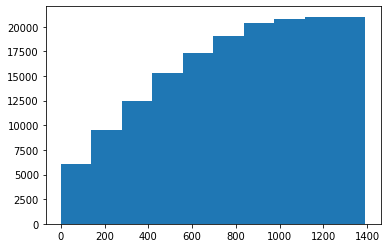

In [83]:
plt.hist(df1_general['Time Played'],cumulative=True)

In [ ]:
# choose only time played > 2 mins

In [84]:
df1_general = df1_general[df1_general['Time Played']>=120]

In [85]:
df1_general.columns

Index(['start_time', 'esports_match_id', 'map_type', 'map_name', 'player_name',
       'team_name', 'hero_name', 'All Damage Done', 'Assists',
       'Average Time Alive', 'Barrier Damage Done', 'Damage Taken', 'Deaths',
       'Eliminations', 'Final Blows', 'Healing Received', 'Hero Damage Done',
       'Multikills', 'Objective Kills', 'Objective Time', 'Solo Kills',
       'Time Alive', 'Time Building Ultimate',
       'Time Elapsed per Ultimate Earned', 'Time Holding Ultimate',
       'Time Played', 'Ultimates Earned - Fractional', 'Ultimates Used'],
      dtype='object', name='stat_name')

In [86]:
# add new matrics:dmg taken per death to indicate 集火效率(focus effiency)
df1_general['Damage Taken Per Death'] = df1_general['Damage Taken'] / df1_general['Deaths']

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


(array([1.1399e+04, 2.4450e+03, 4.8300e+02, 1.5800e+02, 5.3000e+01,
        2.9000e+01, 1.1000e+01, 9.0000e+00, 2.0000e+00, 3.0000e+00]),
 array([  175.        ,  1846.47875207,  3517.95750414,  5189.43625621,
         6860.91500828,  8532.39376035, 10203.87251242, 11875.35126449,
        13546.83001657, 15218.30876864, 16889.78752071]),
 <BarContainer object of 10 artists>)

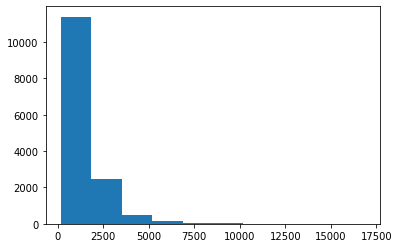

In [87]:
plt.hist(df1_general['Damage Taken Per Death'])

In [88]:
df1_general['hero_name'].unique().reshape(-1,1)

array([['Ana'],
       ['Baptiste'],
       ['Zenyatta'],
       ['Echo'],
       ['Sombra'],
       ['Tracer'],
       ['Mei'],
       ['Reinhardt'],
       ['Winston'],
       ['Moira'],
       ['D.Va'],
       ['Ashe'],
       ['McCree'],
       ['Wrecking Ball'],
       ['Brigitte'],
       ['Lúcio'],
       ['Sigma'],
       ['Doomfist'],
       ['Hanzo'],
       ['Zarya'],
       ['Orisa'],
       ['Widowmaker'],
       ['Genji'],
       ['Reaper'],
       ['Soldier: 76'],
       ['Mercy'],
       ['Bastion'],
       ['Pharah'],
       ['Symmetra'],
       ['Torbjörn'],
       ['Junkrat'],
       ['Roadhog']], dtype=object)

In [89]:
df1_general.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15288 entries, 0 to 21122
Data columns (total 29 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   start_time                        15288 non-null  object 
 1   esports_match_id                  15288 non-null  int64  
 2   map_type                          15288 non-null  object 
 3   map_name                          15288 non-null  object 
 4   player_name                       15288 non-null  object 
 5   team_name                         15288 non-null  object 
 6   hero_name                         15288 non-null  object 
 7   All Damage Done                   15089 non-null  float64
 8   Assists                           14151 non-null  float64
 9   Average Time Alive                15069 non-null  float64
 10  Barrier Damage Done               14098 non-null  float64
 11  Damage Taken                      15288 non-null  float64
 12  Deat

In [90]:
# output file 1: basic output after doing the pivot and should be ready to ues in analysis
df1_general.to_csv('base_file.csv')

### import hero HP look up

In [91]:
hero_hp_lookup = pd.read_excel('data/hero_HP_lookup.xlsx',engine='openpyxl')

In [92]:
# append hero hp
df2 = df1_general.merge(hero_hp_lookup, on='hero_name',how='left')
df2.head()

,start_time,esports_match_id,map_type,map_name,player_name,team_name,hero_name,All Damage Done,Assists,Average Time Alive,...,Solo Kills,Time Alive,Time Building Ultimate,Time Elapsed per Ultimate Earned,Time Holding Ultimate,Time Played,Ultimates Earned - Fractional,Ultimates Used,Damage Taken Per Death,HP
0,2021-04-16 19:08:52,37234,CONTROL,Busan,Crimzo,Houston Outlaws,Ana,3896.300145,3.0,104.250003,...,NaN,312.750009,239.203007,77.514419,72.166002,335.776456,3.085916,3.0,1164.118834,200
1,2021-04-16 19:08:52,37234,CONTROL,Busan,Crimzo,Houston Outlaws,Baptiste,3246.597866,7.0,160.276005,...,NaN,160.276005,132.113004,60.740480,7.089000,160.597425,2.175040,2.0,NaN,200
2,2021-04-16 19:08:52,37234,CONTROL,Busan,Crimzo,Houston Outlaws,Zenyatta,3927.655060,5.0,84.604336,...,NaN,253.813008,260.282008,106.694454,7.523000,279.392479,2.439508,2.0,636.556234,200
3,2021-04-16 19:08:52,37234,CONTROL,Busan,Danteh,Houston Outlaws,Echo,3032.056584,3.0,78.251002,...,NaN,156.502005,156.786005,64.926056,24.731001,186.877490,2.414840,3.0,415.183708,200
4,2021-04-16 19:08:52,37234,CONTROL,Busan,Danteh,Houston Outlaws,Sombra,3450.053787,12.0,NaN,...,NaN,156.672005,149.752004,78.554231,1.920000,157.680613,1.906352,1.0,NaN,200


In [ ]:
# !!! Nan in Death might cause issues later when calculating, causious !!!

In [93]:
df2.columns.tolist()

['start_time',
 'esports_match_id',
 'map_type',
 'map_name',
 'player_name',
 'team_name',
 'hero_name',
 'All Damage Done',
 'Assists',
 'Average Time Alive',
 'Barrier Damage Done',
 'Damage Taken',
 'Deaths',
 'Eliminations',
 'Final Blows',
 'Healing Received',
 'Hero Damage Done',
 'Multikills',
 'Objective Kills',
 'Objective Time',
 'Solo Kills',
 'Time Alive',
 'Time Building Ultimate',
 'Time Elapsed per Ultimate Earned',
 'Time Holding Ultimate',
 'Time Played',
 'Ultimates Earned - Fractional',
 'Ultimates Used',
 'Damage Taken Per Death',
 'HP']

In [94]:
# calculate theoratical deaths: how many deaths would be if no heal given the damage taken per death
# 改完了还没运行，之后要重新运行一遍
df2['Theoratical Deaths per Death'] = df2['Damage Taken Per Death'] / df2['HP']

In [95]:
df2.head()

,start_time,esports_match_id,map_type,map_name,player_name,team_name,hero_name,All Damage Done,Assists,Average Time Alive,...,Time Alive,Time Building Ultimate,Time Elapsed per Ultimate Earned,Time Holding Ultimate,Time Played,Ultimates Earned - Fractional,Ultimates Used,Damage Taken Per Death,HP,Theoratical Deaths
0,2021-04-16 19:08:52,37234,CONTROL,Busan,Crimzo,Houston Outlaws,Ana,3896.300145,3.0,104.250003,...,312.750009,239.203007,77.514419,72.166002,335.776456,3.085916,3.0,1164.118834,200,5.820594
1,2021-04-16 19:08:52,37234,CONTROL,Busan,Crimzo,Houston Outlaws,Baptiste,3246.597866,7.0,160.276005,...,160.276005,132.113004,60.740480,7.089000,160.597425,2.175040,2.0,NaN,200,NaN
2,2021-04-16 19:08:52,37234,CONTROL,Busan,Crimzo,Houston Outlaws,Zenyatta,3927.655060,5.0,84.604336,...,253.813008,260.282008,106.694454,7.523000,279.392479,2.439508,2.0,636.556234,200,3.182781
3,2021-04-16 19:08:52,37234,CONTROL,Busan,Danteh,Houston Outlaws,Echo,3032.056584,3.0,78.251002,...,156.502005,156.786005,64.926056,24.731001,186.877490,2.414840,3.0,415.183708,200,2.075919
4,2021-04-16 19:08:52,37234,CONTROL,Busan,Danteh,Houston Outlaws,Sombra,3450.053787,12.0,NaN,...,156.672005,149.752004,78.554231,1.920000,157.680613,1.906352,1.0,NaN,200,NaN


In [97]:
# new feature added:Theoratical Deaths
df2.to_csv('output1.csv',index=False)

# Deal with Map win/lose 

In [99]:
match_data = pd.read_csv('data/match_map_stats.csv')

In [102]:
match_data_2021 = match_data[match_data['stage']=='OWL 2021']

In [104]:
match_data_2021.to_csv('match_data.csv',index=False)

# Futher processing: convert to 10 min average

In [3]:
df1 = pd.read_csv('data/output1.csv')

In [62]:
df1.rename(columns = {"Theoratical Deaths":"Theoratical Deaths per Death"},inplace=True)

In [65]:
df1['Theoratical Deaths'] = df1['Damage Taken'] / df1['HP']

In [66]:
df1.head()

,start_time,esports_match_id,map_type,map_name,player_name,team_name,hero_name,All Damage Done,Assists,Average Time Alive,Barrier Damage Done,Damage Taken,Deaths,Eliminations,Final Blows,Healing Received,Hero Damage Done,Multikills,Objective Kills,Objective Time,Solo Kills,Time Alive,Time Building Ultimate,Time Elapsed per Ultimate Earned,Time Holding Ultimate,Time Played,Ultimates Earned - Fractional,Ultimates Used,Damage Taken Per Death,HP,Theoratical Deaths per Death,Theoratical Deaths
0,2021-04-16 19:08:52,37234,CONTROL,Busan,Crimzo,Houston Outlaws,Ana,3896.300145,3.0,104.250003,680.000015,2328.237667,2.0,4.0,1.0,1791.586043,3216.300130,NaN,NaN,1.421,NaN,312.750009,239.203007,77.514419,72.166002,335.776456,3.085916,3.0,1164.118834,200,5.820594,11.641188
1,2021-04-16 19:08:52,37234,CONTROL,Busan,Crimzo,Houston Outlaws,Baptiste,3246.597866,7.0,160.276005,1293.426662,791.939045,NaN,8.0,1.0,589.408817,1953.171204,NaN,1.0,4.165,NaN,160.276005,132.113004,60.740480,7.089000,160.597425,2.175040,2.0,NaN,200,NaN,3.959695
2,2021-04-16 19:08:52,37234,CONTROL,Busan,Crimzo,Houston Outlaws,Zenyatta,3927.655060,5.0,84.604336,1152.000000,1273.112467,2.0,7.0,2.0,833.112781,2775.655060,NaN,3.0,0.903,NaN,253.813008,260.282008,106.694454,7.523000,279.392479,2.439508,2.0,636.556234,200,3.182781,6.365562
3,2021-04-16 19:08:52,37234,CONTROL,Busan,Danteh,Houston Outlaws,Echo,3032.056584,3.0,78.251002,568.400000,1245.551124,3.0,4.0,1.0,536.153408,2463.656585,NaN,1.0,14.168,NaN,156.502005,156.786005,64.926056,24.731001,186.877490,2.414840,3.0,415.183708,200,2.075919,6.227756
4,2021-04-16 19:08:52,37234,CONTROL,Busan,Danteh,Houston Outlaws,Sombra,3450.053787,12.0,NaN,692.765769,626.463482,NaN,13.0,1.0,626.464134,2076.782239,1.0,6.0,10.822,NaN,156.672005,149.752004,78.554231,1.920000,157.680613,1.906352,1.0,NaN,200,NaN,3.132317


In [64]:
df1.columns

Index(['start_time', 'esports_match_id', 'map_type', 'map_name', 'player_name',
       'team_name', 'hero_name', 'All Damage Done', 'Assists',
       'Average Time Alive', 'Barrier Damage Done', 'Damage Taken', 'Deaths',
       'Eliminations', 'Final Blows', 'Healing Received', 'Hero Damage Done',
       'Multikills', 'Objective Kills', 'Objective Time', 'Solo Kills',
       'Time Alive', 'Time Building Ultimate',
       'Time Elapsed per Ultimate Earned', 'Time Holding Ultimate',
       'Time Played', 'Ultimates Earned - Fractional', 'Ultimates Used',
       'Damage Taken Per Death', 'HP', 'Theoratical Deaths per Death'],
      dtype='object')

In [14]:
(df1['Average Time Alive']/df1['Time Played']).describe()

count    15069.000000
mean         0.263373
std          0.218998
min          0.042267
25%          0.124242
50%          0.187171
75%          0.309816
max          1.009267
dtype: float64

In [32]:
df1[(df1['Time Alive']>=df1['Time Played'])&(df1['Deaths'].isna()==False)]

,start_time,esports_match_id,map_type,map_name,player_name,team_name,hero_name,All Damage Done,Assists,Average Time Alive,Barrier Damage Done,Damage Taken,Deaths,Eliminations,Final Blows,Healing Received,Hero Damage Done,Multikills,Objective Kills,Objective Time,Solo Kills,Time Alive,Time Building Ultimate,Time Elapsed per Ultimate Earned,Time Holding Ultimate,Time Played,Ultimates Earned - Fractional,Ultimates Used,Damage Taken Per Death,HP,Theoratical Deaths
2600,2021-05-02 09:28:40,37382,ASSAULT,Volskaya Industries,Rascal,Philadelphia Fusion,Tracer,2174.192054,1.0,64.872002,752.865244,233.814901,1.0,2.0,1.0,55.044923,1421.306810,NaN,NaN,NaN,NaN,129.744004,126.846004,97.362261,3.115,129.464751,1.302825,1.0,233.814901,150,1.558766
6963,2021-06-26 13:48:19,37328,CONTROL,Oasis,Friday,New York Excelsior,Lúcio,2543.013634,5.0,228.276007,1410.000000,1878.512954,1.0,6.0,1.0,1629.856512,1133.013634,NaN,3.0,6.531,NaN,228.276007,220.255006,152.226555,0.658,227.724568,1.446890,1.0,1878.512954,200,9.392565


In [52]:
df1.filter(like = "Time")

,Average Time Alive,Objective Time,Time Alive,Time Building Ultimate,Time Elapsed per Ultimate Earned,Time Holding Ultimate,Time Played
0,104.250003,1.421000,312.750009,239.203007,77.514419,72.166002,335.776456
1,160.276005,4.165000,160.276005,132.113004,60.740480,7.089000,160.597425
2,84.604336,0.903000,253.813008,260.282008,106.694454,7.523000,279.392479
3,78.251002,14.168000,156.502005,156.786005,64.926056,24.731001,186.877490
4,NaN,10.822000,156.672005,149.752004,78.554231,1.920000,157.680613
...,...,...,...,...,...,...,...
15283,40.446144,1.309000,283.123009,278.428008,137.253244,71.960002,351.384603
15284,143.856004,28.105001,143.856004,136.202004,114.185789,25.395001,163.540284
15285,71.668002,14.021000,430.008013,456.704013,120.143892,12.599000,480.810741
15286,59.709502,81.985002,358.257011,282.526008,108.539992,117.732003,408.794545


{'whiskers': [<matplotlib.lines.Line2D at 0x7fe9679f3110>,
 'caps': [<matplotlib.lines.Line2D at 0x7fe9679f38d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fe9679ecd90>],
 'medians': [<matplotlib.lines.Line2D at 0x7fe9679ff110>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fe9679ff550>],
 'means': []}

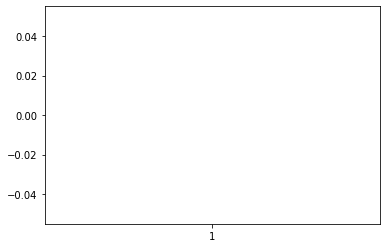

In [41]:
plt.boxplot(df1['Time Holding Ultimate'])

In [36]:
df1['Time Holding Ultimate'].describe()

count    15098.000000
mean        82.574733
std         71.487368
min          0.001000
25%         29.130251
50%         64.307502
75%        118.719504
max        603.967018
Name: Time Holding Ultimate, dtype: float64

In [67]:
df1.columns

Index(['start_time', 'esports_match_id', 'map_type', 'map_name', 'player_name',
       'team_name', 'hero_name', 'All Damage Done', 'Assists',
       'Average Time Alive', 'Barrier Damage Done', 'Damage Taken', 'Deaths',
       'Eliminations', 'Final Blows', 'Healing Received', 'Hero Damage Done',
       'Multikills', 'Objective Kills', 'Objective Time', 'Solo Kills',
       'Time Alive', 'Time Building Ultimate',
       'Time Elapsed per Ultimate Earned', 'Time Holding Ultimate',
       'Time Played', 'Ultimates Earned - Fractional', 'Ultimates Used',
       'Damage Taken Per Death', 'HP', 'Theoratical Deaths per Death',
       'Theoratical Deaths'],
      dtype='object')

In [70]:
avg_10min_cols = ['All Damage Done', 'Assists',
       'Average Time Alive', 'Barrier Damage Done', 'Damage Taken', 'Deaths',
       'Eliminations', 'Final Blows', 'Healing Received', 'Hero Damage Done',
       'Multikills', 'Objective Kills', 'Objective Time', 'Solo Kills',
       'Time Alive', 'Time Building Ultimate','Time Holding Ultimate',
       'Time Played', 'Ultimates Earned - Fractional', 'Ultimates Used','Theoratical Deaths']
non_avg_10min_cols = [x for x in df1.columns if x not in avg_10min_cols]

In [71]:
df2 = df1[non_avg_10min_cols]
for col in avg_10min_cols:
    df2[col+'_avg_10min'] = df1[col]*600/df1['Time Played']

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [58]:
df1.head()

,start_time,esports_match_id,map_type,map_name,player_name,team_name,hero_name,All Damage Done,Assists,Average Time Alive,Barrier Damage Done,Damage Taken,Deaths,Eliminations,Final Blows,Healing Received,Hero Damage Done,Multikills,Objective Kills,Objective Time,Solo Kills,Time Alive,Time Building Ultimate,Time Elapsed per Ultimate Earned,Time Holding Ultimate,Time Played,Ultimates Earned - Fractional,Ultimates Used,Damage Taken Per Death,HP,Theoratical Deaths
0,2021-04-16 19:08:52,37234,CONTROL,Busan,Crimzo,Houston Outlaws,Ana,3896.300145,3.0,104.250003,680.000015,2328.237667,2.0,4.0,1.0,1791.586043,3216.300130,NaN,NaN,1.421,NaN,312.750009,239.203007,77.514419,72.166002,335.776456,3.085916,3.0,1164.118834,200,5.820594
1,2021-04-16 19:08:52,37234,CONTROL,Busan,Crimzo,Houston Outlaws,Baptiste,3246.597866,7.0,160.276005,1293.426662,791.939045,NaN,8.0,1.0,589.408817,1953.171204,NaN,1.0,4.165,NaN,160.276005,132.113004,60.740480,7.089000,160.597425,2.175040,2.0,NaN,200,NaN
2,2021-04-16 19:08:52,37234,CONTROL,Busan,Crimzo,Houston Outlaws,Zenyatta,3927.655060,5.0,84.604336,1152.000000,1273.112467,2.0,7.0,2.0,833.112781,2775.655060,NaN,3.0,0.903,NaN,253.813008,260.282008,106.694454,7.523000,279.392479,2.439508,2.0,636.556234,200,3.182781
3,2021-04-16 19:08:52,37234,CONTROL,Busan,Danteh,Houston Outlaws,Echo,3032.056584,3.0,78.251002,568.400000,1245.551124,3.0,4.0,1.0,536.153408,2463.656585,NaN,1.0,14.168,NaN,156.502005,156.786005,64.926056,24.731001,186.877490,2.414840,3.0,415.183708,200,2.075919
4,2021-04-16 19:08:52,37234,CONTROL,Busan,Danteh,Houston Outlaws,Sombra,3450.053787,12.0,NaN,692.765769,626.463482,NaN,13.0,1.0,626.464134,2076.782239,1.0,6.0,10.822,NaN,156.672005,149.752004,78.554231,1.920000,157.680613,1.906352,1.0,NaN,200,NaN


In [77]:
df2.filter(like='Death')

,Damage Taken Per Death,Theoratical Deaths per Death,Deaths_avg_10min,Theoratical Deaths_avg_10min
0,1164.118834,5.820594,3.573806,20.801676
1,NaN,NaN,NaN,14.793619
2,636.556234,3.182781,4.295033,13.670151
3,415.183708,2.075919,9.631979,19.995203
4,NaN,NaN,NaN,11.918970
...,...,...,...,...
15283,598.263095,2.393052,11.952715,28.603473
15284,894.821125,3.579285,7.337642,26.263507
15285,1457.914287,3.644786,6.239461,22.741499
15286,1232.617647,3.081544,7.338650,22.614373


In [78]:
df2.to_csv('10min_avged.csv')